In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [29]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


#### Проверяем тип данных

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

#### Mожем увидеть что тип данных DATE_DIED (дата смерти или выздоравления) имеет тип object что не верно. Когда мы говорим о дате, времен мы должны присваивать специальный тип datatime

In [31]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors ='coerce')
df['DATE_DIED'] = df['DATE_DIED'].dt.date
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,2020-03-05,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,2020-03-06,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,2020-09-06,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-12-06,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,NaT,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,NaT,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,NaT,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,NaT,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


Отлично

In [32]:
df['STATUS'] = df['DATE_DIED'].copy(deep=False)
df['STATUS'] = df['STATUS'].fillna(1)
df.loc[df['STATUS'] !=1, 'STATUS'] =0 # изучить возможность loc
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,STATUS
0,2,1,1,1,2020-03-05,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,0
1,2,1,2,1,2020-03-06,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,0
2,2,1,2,2,2020-09-06,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,2020-12-06,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,0
4,2,1,2,1,NaT,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048571,1,13,2,2,NaT,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,NaT,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048573,2,13,2,1,NaT,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97,1


#### Узнаем сколько в наших данных людей кто умер и кто выздоровел

In [33]:
count_dead = (df['STATUS'] == 0).sum()
count_live = (df['STATUS'] == 1).sum()
print(count_dead)
print(count_live)

30492
1018083


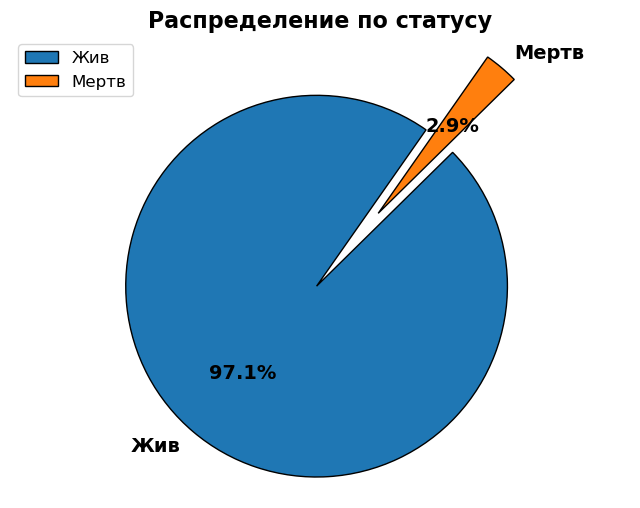

In [34]:
# Круговая  диаграмма сколько живых и мертвых

status_counts = df['STATUS'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    status_counts, 
    labels=['Жив', 'Мертв'], 
    autopct='%1.1f%%', 
    startangle=55,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14, "weight":"bold"},
    explode=[0.5, 0]
    )

plt.title('Распределение по статусу', fontsize=16, weight='bold')
plt.legend(['Жив', 'Мертв'], loc="best", fontsize=12)
plt.axis('equal')  # Чтобы круговая диаграмма была кругом

plt.show()

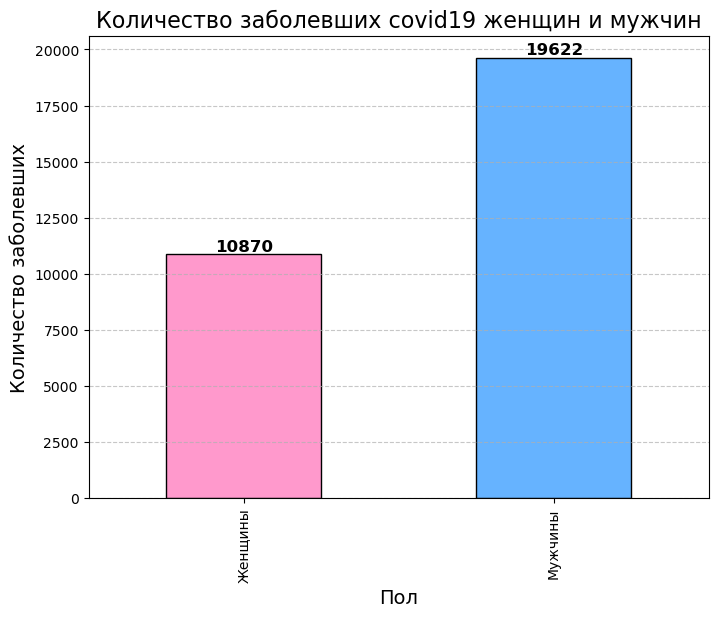

In [35]:
covid_women = df[(df['STATUS'] == 0) & (df['SEX'] == 1)]
covid_men = df[(df['STATUS'] == 0) & (df['SEX'] == 2)]

status_covid_women = covid_women.shape[0]
status_covid_men = covid_men.shape[0]

status_counts = pd.Series([status_covid_women, status_covid_men], index=['Женщины', 'Мужчины'])

plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=['#ff99cc', '#66b3ff'], edgecolor='black')

plt.title('Количество заболевших covid19 женщин и мужчин', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Количество заболевших', fontsize=14)

for i, count in enumerate(status_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

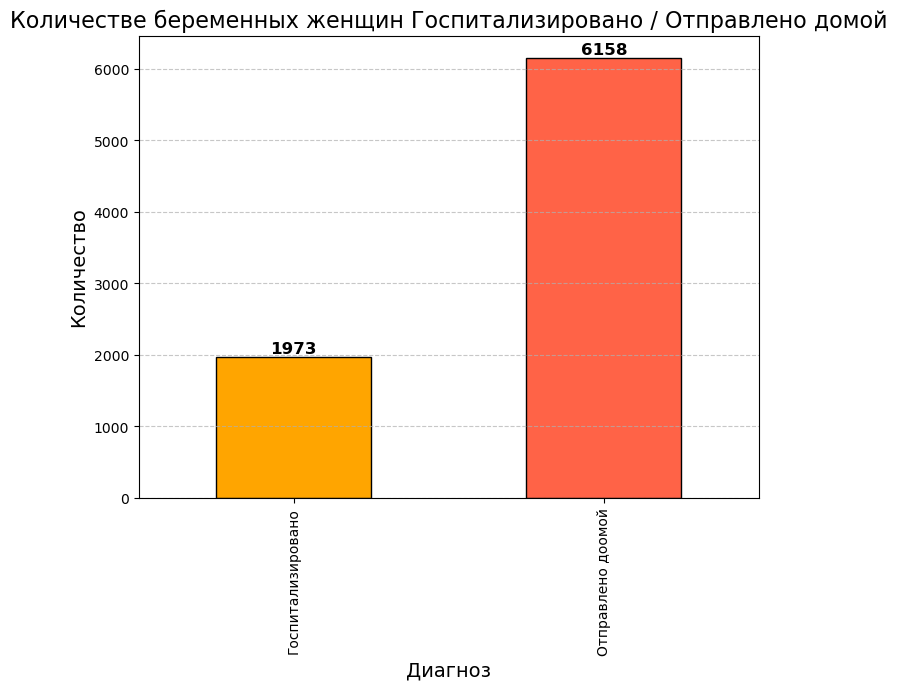

In [36]:
pregnant_women_hospitalized = df[(df['PREGNANT'] == 1) & (df['PATIENT_TYPE'] == 2)]
pregnant_women_home = df[(df['PREGNANT'] == 1) & (df['PATIENT_TYPE'] == 1)]

count_pregnant_hospitalized = pregnant_women_hospitalized.shape[0]
count_pregnant_home = pregnant_women_home.shape[0]

status_pregnant_women = pd.Series([count_pregnant_hospitalized, count_pregnant_home], index=['Госпитализировано', 'Отправлено доомой'])

plt.figure(figsize=(8, 6))
ax = status_pregnant_women.plot(kind='bar', color=['#ffa500', '#ff6347'], edgecolor='black')

plt.title('Количестве беременных женщин Госпитализировано / Отправлено домой', fontsize=16)
plt.xlabel('Диагноз', fontsize=14)
plt.ylabel('Количество', fontsize=14)

for i, count in enumerate(status_pregnant_women):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Найдем средний возраст при котором люди болели 

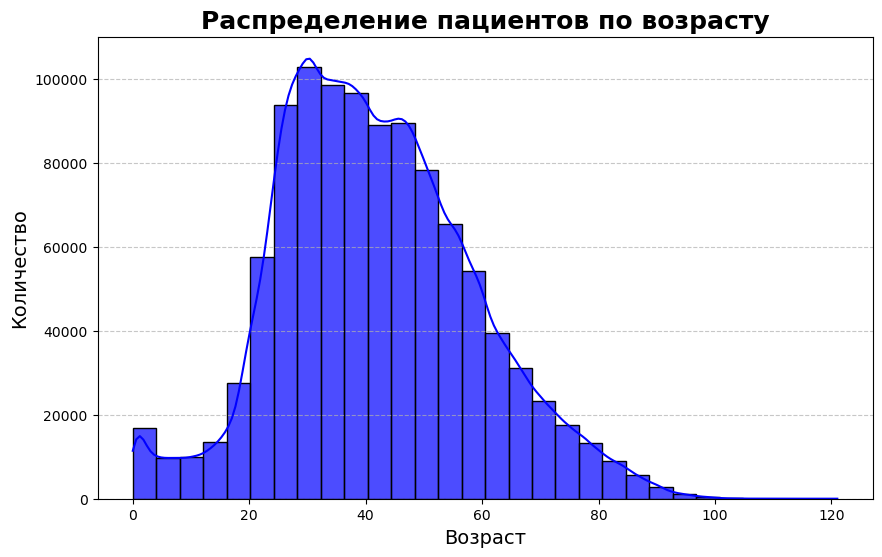

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='AGE', bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)

plt.title('Распределение пациентов по возрасту', fontsize=18, fontweight='bold')
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Видим, что у некоторых столбцов, которые судя по описанию должны иметь бинарные признаки (болен диабетом или нет, беременна или нет), имеют по 3-4 признака. Это можно исправить:

In [38]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n') # Статус беременности мужиков

MALE
PREGNANT
97    523511
Name: count, dtype: int64


In [39]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2) # Заменим лишние типы на "2" (предполагая, что статус "2" означаент "не беременна", раз он у большинства женщин)
df['PREGNANT'] = df['PREGNANT'].replace(98,2) 

In [40]:
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n') # Статусы беременности женщин

FEMALE
PREGNANT
2    516933
1      8131
Name: count, dtype: int64


In [41]:
df['PREGNANT'].value_counts()

PREGNANT
2    1040444
1       8131
Name: count, dtype: int64

#### В целом в коде много где встречаются значения [97, 98, 99], которые скорее всего выступают в роли плейсхолдеров для неизвестных значений. В идеале просмотреть все классы где есть подобная проблема и либо заменить их на Nan, либо подогнать под другие значения там где это очевидно (как с беременностью)

In [42]:
df['ICU'] .unique()

array([97,  2,  1, 99])

In [43]:
def replace_values(df, columns, old_values, new_value= np.nan ):
    for column in columns:
        df[column] = df[column].replace(old_values, new_value)
    return df
columns_to_replace = [
    'INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 
    'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU'
]

values_to_replace = {
    'INTUBED': [99, 97],
    'PNEUMONIA': [99],
    'DIABETES': [98],
    'COPD': [98],
    'ASTHMA': [98],
    'INMSUPR': [98, 97],
    'HIPERTENSION': [98],
    'OTHER_DISEASE': [98],
    'CARDIOVASCULAR': [98],
    'OBESITY': [98],
    'RENAL_CHRONIC': [98],
    'TOBACCO': [98],
    'ICU': [97, 99]
}

# Замена значений
for column in columns_to_replace:
    replace_values(df, [column], values_to_replace[column])

for column in columns_to_replace:
    df[column] = df[column].astype('Int64')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,STATUS
0,2,1,1,1,2020-03-05,<NA>,1,65,2,2,2,2,2,1,2,2,2,2,2,3,<NA>,0
1,2,1,2,1,2020-03-06,<NA>,1,72,2,2,2,2,2,1,2,2,1,1,2,5,<NA>,0
2,2,1,2,2,2020-09-06,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,2020-12-06,<NA>,2,53,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,0
4,2,1,2,1,NaT,<NA>,2,68,2,1,2,2,2,1,2,2,2,2,2,3,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,<NA>,2,40,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1
1048571,1,13,2,2,NaT,2,2,51,2,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,NaT,<NA>,2,55,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1
1048573,2,13,2,1,NaT,<NA>,2,28,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1


In [44]:
df.isnull().sum()

USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                  855869
PNEUMONIA                 16003
AGE                           0
PREGNANT                      0
DIABETES                   3338
COPD                       3003
ASTHMA                     2979
INMSUPR                    3404
HIPERTENSION               3104
OTHER_DISEASE              5045
CARDIOVASCULAR             3076
OBESITY                    3032
RENAL_CHRONIC              3006
TOBACCO                    3220
CLASIFFICATION_FINAL          0
ICU                      856032
STATUS                        0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # or 'mean', 'median'
for column in columns_to_replace:
    df[column] = imputer.fit_transform(df[[column]])

In [46]:
df.isnull().sum()

USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                       0
PNEUMONIA                     0
AGE                           0
PREGNANT                      0
DIABETES                      0
COPD                          0
ASTHMA                        0
INMSUPR                       0
HIPERTENSION                  0
OTHER_DISEASE                 0
CARDIOVASCULAR                0
OBESITY                       0
RENAL_CHRONIC                 0
TOBACCO                       0
CLASIFFICATION_FINAL          0
ICU                           0
STATUS                        0
dtype: int64

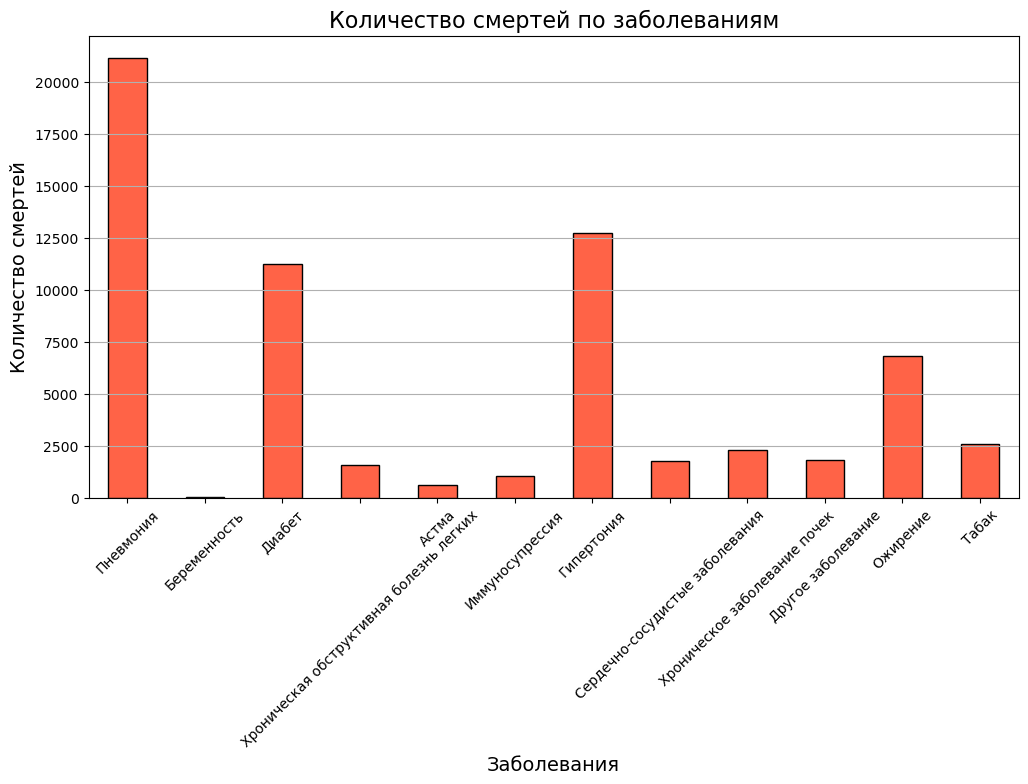

In [47]:
dead_patients = df[df['STATUS'] == 0]

conditions = {
    'Пневмония': 'PNEUMONIA',
    'Беременность': 'PREGNANT',
    'Диабет': 'DIABETES',
    'Хроническая обструктивная болезнь легких': 'COPD',
    'Астма': 'ASTHMA',
    'Иммуносупрессия': 'INMSUPR',
    'Гипертония': 'HIPERTENSION',
    'Сердечно-сосудистые заболевания': 'CARDIOVASCULAR',
    'Хроническое заболевание почек': 'RENAL_CHRONIC',
    'Другое заболевание': 'OTHER_DISEASE',
    'Ожирение': 'OBESITY',
    'Табак': 'TOBACCO'
}


death_counts = {condition: dead_patients[dead_patients[col] == 1].shape[0] for condition, col in conditions.items()}


death_counts_series = pd.Series(death_counts)


plt.figure(figsize=(12, 6))
ax = death_counts_series.plot(kind='bar', color='#ff6347', edgecolor='black')

plt.title('Количество смертей по заболеваниям', fontsize=16)
plt.xlabel('Заболевания', fontsize=14)
plt.ylabel('Количество смертей', fontsize=14)
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()

## Формулируем гипотезы 
### H<sub>0</sub> Пол пациента не влияет на риск тяжелого течения COVID-19. То есть, вероятность тяжелого течения заболевания (classification = 1-3) у женщин (sex = 1) равна вероятности тяжелого течения заболевания у мужчин (sex = 2).
 
### H<sub>1</sub> Пол пациента влияет на риск тяжелого течения COVID-19. То есть, вероятность тяжелого течения заболевания (classification = 1-3) у женщин (sex = 1) ниже, чем у мужчин (sex = 2).

In [48]:
import seaborn as sns
from scipy import stats


# Фильтруем данные для классификации 1-3 и 4+
df['classification_group'] = df['CLASIFFICATION_FINAL'].apply(lambda x: '1-3' if x in [1, 2, 3] else '4-7')

# Проверка нормальности распределения для возрастной группы
age_1_3 = df[df['classification_group'] == '1-3']['AGE'].dropna()
age_4_plus = df[df['classification_group'] == '4-7']['AGE'].dropna()

# 1. Проверка нормальности с помощью теста Шапиро-Уилка
shapiro_test_1_3 = stats.shapiro(age_1_3)
shapiro_test_4_plus = stats.shapiro(age_4_plus)

print(f"Shapiro-Wilk test for classification 1-3: W={shapiro_test_1_3.statistic}, p-value={shapiro_test_1_3.pvalue}")
print(f"Shapiro-Wilk test for classification 4+: W={shapiro_test_4_plus.statistic}, p-value={shapiro_test_4_plus.pvalue}")


Shapiro-Wilk test for classification 1-3: W=0.9912295250703197, p-value=1.229039045031694e-74
Shapiro-Wilk test for classification 4+: W=0.98905164524854, p-value=4.5743999662654985e-86


/usr/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 391979.
  res = hypotest_fun_out(*samples, **kwds)
/usr/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 656596.
  res = hypotest_fun_out(*samples, **kwds)


#### Результаты теста Шапиро-Уилка, которые вы привели, показывают, что обе выборки (классификации 1-3 и 4+) имеют значительное отклонение от нормального распределения. Давайте разберем результаты подробнее:

####  1. Значение W: 
####    - Значение W теста Шапиро-Уилка варьируется от 0 до 1. Чем ближе W к 1, тем более нормально распределены данные. В вашем случае:
####      - Для классификации 1-3: W = 0.9912
####     - Для классификации 4+: W = 0.9891
####    - Оба значения W близки к 1, но это не единственный показатель.

#### 2. p-value:
####    - p-value показывает вероятность того, что данные могут быть нормально распределены. Обычно, если p-value меньше выбранного уровня значимости (обычно 0.05), мы отвергаем нулевую гипотезу о нормальности распределения.
####    - В вашем случае:
####      - Для классификации 1-3: p-value = 1.2290e-74 (что эквивалентно 0.00000000000000000000000000000001229)
####      - Для классификации 4+: p-value = 4.5744e-86 (что эквивалентно 0.00000000000000000000000000000000045744)

#### Оба p-value значительно меньше 0.05, что означает:

#### Выводы:

#### - Следующие шаги: Поскольку данные не нормально распределены, для дальнейшего анализа (например, для сравнения средних значений между группами) следует использовать непараметрические методы, такие как тест Манна-Уитни, вместо t-теста. Тест Манна-Уитни будет проверять, есть ли статистически значимые различия в распределении возраста между мужчинами и женщинами в каждой из классификаций (1-3 и 4-7).

In [49]:
age_1_3_men = df[(df['classification_group'] == '1-3') & (df['SEX'] == 2)]['AGE'].dropna()
age_1_3_women = df[(df['classification_group'] == '1-3') & (df['SEX'] == 1)]['AGE'].dropna()

age_4_plus_men = df[(df['classification_group'] == '4-7') & (df['SEX'] == 2)]['AGE'].dropna()
age_4_plus_women = df[(df['classification_group'] == '4-7') & (df['SEX'] == 1)]['AGE'].dropna()

# Выполнение теста Манна-Уитни
mann_whitney_1_3 = stats.mannwhitneyu(age_1_3_men, age_1_3_women, alternative='less')
mann_whitney_4_plus = stats.mannwhitneyu(age_4_plus_men, age_4_plus_women, alternative='less')

print(f"Mann-Whitney U test for classification 1-3: U={mann_whitney_1_3.statistic}, p-value={mann_whitney_1_3.pvalue}")
print(f"Mann-Whitney U test for classification 4+: U={mann_whitney_4_plus.statistic}, p-value={mann_whitney_4_plus.pvalue}")

Mann-Whitney U test for classification 1-3: U=20144985584.5, p-value=1.0
Mann-Whitney U test for classification 4+: U=54190677552.0, p-value=0.9999999243808148


- В обеих классификациях (1-3 и 4+) пол пациента не оказывает влияния на риск тяжелого течения COVID-19 в вашем наборе данных.
- Это может означать, что в вашем конкретном наборе данных пол не является значимым предиктором для различий в возрасте между пациентами, страдающими от разных тяжестей COVID-19.

### H<sub>0</sub>У пациентов, переболевших пневмонией и с тежелым течением COVID-19, нет статистически значимых различий в возрасте между мужчинами и женщинами
### H<sub>1</sub>У пациентов, переболевших пневмонией и с тежелым течением COVID-19, есть статистически значимые различия в возрасте между мужчинами и женщинами.

In [50]:
import pandas as pd
from scipy import stats


filtered_data = df[(df['PNEUMONIA'] == 1) & (df['CLASIFFICATION_FINAL'].isin([1, 2, 3]))]

# Разделение данных по полу
men_ages = filtered_data[filtered_data['SEX'] == 'male']['AGE']
women_ages = filtered_data[filtered_data['SEX'] == 'female']['AGE']

# Проверка нормальности распределения
shapiro_men = stats.shapiro(men_ages)
shapiro_women = stats.shapiro(women_ages)

print('Shapiro-Wilk test for men:', shapiro_men)
print('Shapiro-Wilk test for women:', shapiro_women)

# Проверка, нормально ли распределены данные
normal_men = shapiro_men.pvalue > 0.05
normal_women = shapiro_women.pvalue > 0.05

# Проведение соответствующего теста
if normal_men and normal_women:
    # Если данные нормально распределены, используем t-тест
    t_stat, p_value = stats.ttest_ind(men_ages, women_ages)
    print('T-test result:', t_stat, p_value)
else:
    # Если данные не нормально распределены, используем тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(men_ages, women_ages)
    print('Mann-Whitney U test result:', u_stat, p_value)


print(p_value)



Shapiro-Wilk test for men: ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))
Shapiro-Wilk test for women: ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))
Mann-Whitney U test result: nan nan
nan


/tmp/ipykernel_71745/1882091314.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_men = stats.shapiro(men_ages)
/tmp/ipykernel_71745/1882091314.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  shapiro_women = stats.shapiro(women_ages)
/tmp/ipykernel_71745/1882091314.py:29: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value = stats.mannwhitneyu(men_ages, women_ages)
